# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%pip install citipy

     |████████████████████████████████| 557 kB 45 kB/s eta 0:00:013
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=c4ae357e27e2a3fb30e907aa2a5afe69e28231dc47de5c11de1534267bd97403
  Stored in directory: /Users/joshmaldo/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set up empty variables for needed information
City = []
Lat = []
Lng = []
Max_Temp = []
Cloudiness = []
Humidity = []
Wind_Speed = []
Country = []
Date = []

# Setting up for count
count=1

# Setting up the URL for Temp in F - this was obtained from API sit documentation
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key+"&q="

# Setting up header as suggested in example shown
print("Beginning Data Retrieval")
print("-----------------------------")

# Setting up loop for the retrieval of cities
for city in cities:
    # Using query url to include each city
    query_url = url + city
    # Setting up try statement to avoid error and appending all list for data
    try:
        response = requests.get(query_url).json()
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Cloudiness.append(response['clouds']['all'])
        Humidity.append(response['main']['humidity'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        # Set up processing statement for query
        print(f'Processing City {count} of {len(cities)} | {city} ')
        # Formula to increase count
        count = count + 1
    except KeyError:
        print(f'City Not Found. Skipping...')
# Printing line for end of loop
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing City 1 of 643 | los llanos de aridane 
City Not Found. Skipping...
Processing City 2 of 643 | provideniya 
Processing City 3 of 643 | avarua 
Processing City 4 of 643 | rikitea 
Processing City 5 of 643 | bambous virieux 
Processing City 6 of 643 | hambantota 
Processing City 7 of 643 | chaman 
Processing City 8 of 643 | cosala 
Processing City 9 of 643 | bredasdorp 
Processing City 10 of 643 | jambi 
Processing City 11 of 643 | oxbow 
Processing City 12 of 643 | afsin 
Processing City 13 of 643 | barrow 
Processing City 14 of 643 | hermanus 
Processing City 15 of 643 | mataura 
Processing City 16 of 643 | assomada 
Processing City 17 of 643 | touros 
Processing City 18 of 643 | beringovskiy 
Processing City 19 of 643 | vaini 
Processing City 20 of 643 | albany 
Processing City 21 of 643 | cape town 
Processing City 22 of 643 | airai 
Processing City 23 of 643 | westport 
Processing City 24 of 643 | songea 
Processing Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Putting together dictionary of info collected
weather_dict = {"City": City,
               "Lat": Lat,
               "Lng": Lng,
               "Max Temp (F)": Max_Temp,
               "Cloudiness": Cloudiness,
               "Humidity": Humidity,
               "Wind Speed": Wind_Speed,
               "Country": Country,
               "Date": Date}
# Creating data frame from dict
weather_info = pd.DataFrame(weather_dict)
weather_info.head()

,City,Lat,Lng,Max Temp (F),Cloudiness,Humidity,Wind Speed,Country,Date
0,Los Llanos de Aridane,28.6585,-17.9182,64.40,0,63,5.75,ES,1619578636
1,Provideniya,64.3833,-173.3000,32.00,90,80,6.71,RU,1619578637
2,Avarua,-21.2078,-159.7750,82.40,87,74,6.91,CK,1619578637
3,Rikitea,-23.1203,-134.9692,76.96,100,74,11.99,PF,1619578382
4,Bambous Virieux,-20.3428,57.7575,77.00,75,88,11.50,MU,1619578638


In [2]:
# Exporting data frame to csv file
# weather_info.to_csv("../output_data/weather_info.csv", index=False)

# Ensuring data frame was exported
weather_df = pd.read_csv("../output_data/weather_info.csv")
weather_df.head()

,City,Lat,Lng,Max Temp (F),Cloudiness,Humidity,Wind Speed,Country,Date
0,Los Llanos de Aridane,28.6585,-17.9182,64.40,0,63,5.75,ES,1619578636
1,Provideniya,64.3833,-173.3000,32.00,90,80,6.71,RU,1619578637
2,Avarua,-21.2078,-159.7750,82.40,87,74,6.91,CK,1619578637
3,Rikitea,-23.1203,-134.9692,76.96,100,74,11.99,PF,1619578382
4,Bambous Virieux,-20.3428,57.7575,77.00,75,88,11.50,MU,1619578638


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
# Searching for possible cities with >100% Humidity
humid100 = weather_df.loc[weather_df["Humidity"]>100]
humid100

,City,Lat,Lng,Max Temp (F),Cloudiness,Humidity,Wind Speed,Country,Date


In [4]:
#  No cities were found with >100% Humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

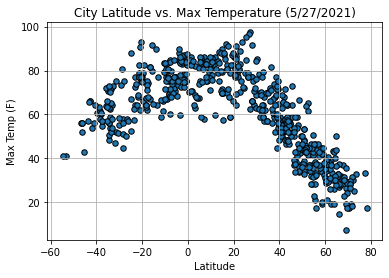

In [5]:
weather_df.plot(kind='scatter', x="Lat", y="Max Temp (F)", edgecolors='k', s=30, grid=True)
plt.title("City Latitude vs. Max Temperature (5/27/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/city_latvsmaxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

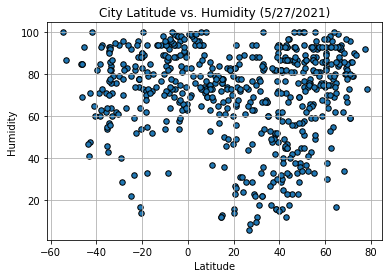

In [6]:
weather_df.plot(kind='scatter', x="Lat", y="Humidity", edgecolors='k', s=30, grid=True)
plt.title("City Latitude vs. Humidity (5/27/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Images/city_latvshumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

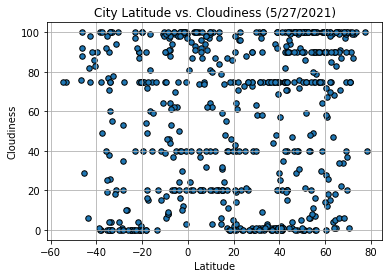

In [7]:
weather_df.plot(kind='scatter', x="Lat", y="Cloudiness", edgecolors='k', s=30, grid=True)
plt.title("City Latitude vs. Cloudiness (5/27/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/city_latvscloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

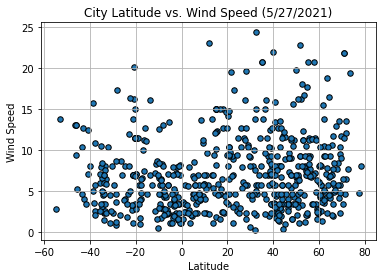

In [8]:
weather_df.plot(kind='scatter', x="Lat", y="Wind Speed", edgecolors='k', s=30, grid=True)
plt.title("City Latitude vs. Wind Speed (5/27/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../Images/city_latvswindspeed.png")
plt.show()

## Linear Regression

In [5]:
# Creating function for linear regression equation and plots
def regressplot(x_values, y_values, y_label, title, file_name, lineposition):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r--")
    plt.annotate(line_eq, lineposition, fontsize=15, color ='r')
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}.")
    plt.savefig(f"../Images/{file_name}.png")
    plt.show()

In [6]:
# Creating data frames for northern and southern hemisphere
northern_hem_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hem_df = weather_df.loc[weather_df["Lat"] < 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7782439638479264.


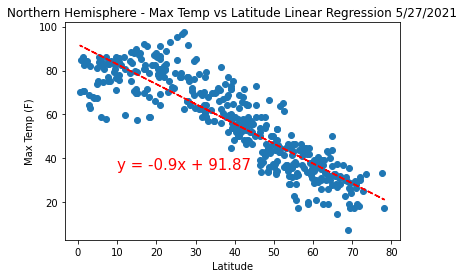

In [24]:
# Creating formula for northern hemisphere max temp linear regression
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp (F)"]
y_label = "Max Temp (F)"
title = "Northern Hemisphere - Max Temp vs Latitude Linear Regression 5/27/2021"
file_name = "northernhem_maxtempvslat"
lineposition = (10,35)

regressplot(x_values, y_values, y_label, title, file_name, lineposition)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47361175301515435.


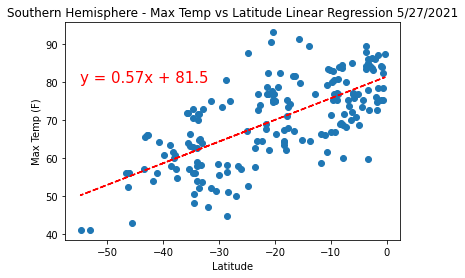

In [23]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp (F)"]
y_label = "Max Temp (F)"
title = "Southern Hemisphere - Max Temp vs Latitude Linear Regression 5/27/2021"
file_name = "southernhem_maxtempvslat"
lineposition = (-55,80)

regressplot(x_values, y_values, y_label, title, file_name, lineposition)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011360857370242557.


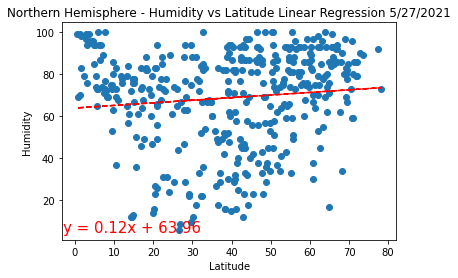

In [44]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
y_label = "Humidity"
title = "Northern Hemisphere - Humidity vs Latitude Linear Regression 5/27/2021"
file_name = "northernhem_humidityvslat"
lineposition = (-3,5)

regressplot(x_values, y_values, y_label, title, file_name, lineposition)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.023174094340219834.


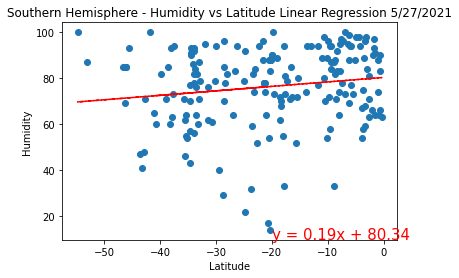

In [46]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]
y_label = "Humidity"
title = "Southern Hemisphere - Humidity vs Latitude Linear Regression 5/27/2021"
file_name = "southernhem_humidityvslat"
lineposition = (-20,10)

regressplot(x_values, y_values, y_label, title, file_name, lineposition)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02611502372468475.


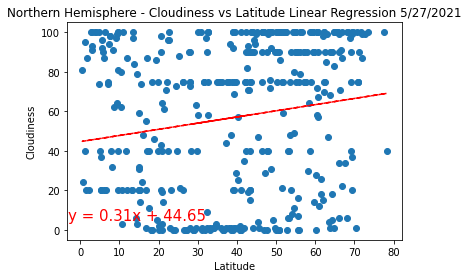

In [47]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]
y_label = "Cloudiness"
title = "Northern Hemisphere - Cloudiness vs Latitude Linear Regression 5/27/2021"
file_name = "northernhem_cloudinessvslat"
lineposition = (-3,5)

regressplot(x_values, y_values, y_label, title, file_name, lineposition)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008767183620047804.


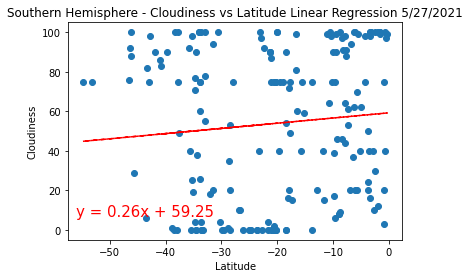

In [61]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]
y_label = "Cloudiness"
title = "Southern Hemisphere - Cloudiness vs Latitude Linear Regression 5/27/2021"
file_name = "southernhem_cloudinessvslat"
lineposition = (-56,7)

regressplot(x_values, y_values, y_label, title, file_name, lineposition)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00770723735725991.


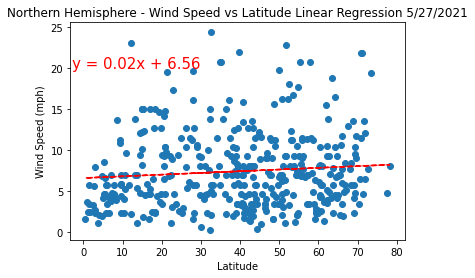

In [8]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
y_label = "Wind Speed (mph)"
title = "Northern Hemisphere - Wind Speed vs Latitude Linear Regression 5/27/2021"
file_name = "northernhem_cloudinessvslat"
lineposition = (-3,20)

regressplot(x_values, y_values, y_label, title, file_name, lineposition)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


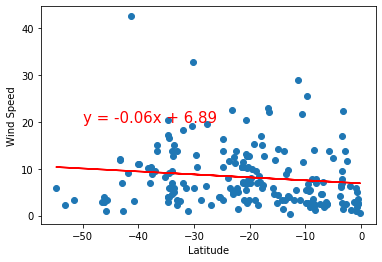